# Importing Libraries:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Loading the Dataset:

In [21]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# Full column names for the dataset
column_names = [
    "Per capita crime rate by town",
    "Proportion of residential land zoned for lots over 25,000 sq. ft.",
    "Proportion of non-retail business acres per town",
    "Charles River dummy variable (1 if tract bounds river; 0 otherwise)",
    "Nitric oxides concentration (parts per 10 million)",
    "Average number of rooms per dwelling",
    "Proportion of owner-occupied units built prior to 1940",
    "Weighted distances to five Boston employment centers",
    "Index of accessibility to radial highways",
    "Full-value property tax rate per $10,000",
    "Pupil-teacher ratio by town",
    "1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town",
    "Percentage of lower status of the population",
    "Median value of owner-occupied homes in $1000s"
]
# Reading the dataset into a DataFrame
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display the first few rows of the DataFrame
data.head()


,Per capita crime rate by town,"Proportion of residential land zoned for lots over 25,000 sq. ft.",Proportion of non-retail business acres per town,Charles River dummy variable (1 if tract bounds river; 0 otherwise),Nitric oxides concentration (parts per 10 million),Average number of rooms per dwelling,Proportion of owner-occupied units built prior to 1940,Weighted distances to five Boston employment centers,Index of accessibility to radial highways,"Full-value property tax rate per $10,000",Pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town,Percentage of lower status of the population,Median value of owner-occupied homes in $1000s
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
data

,Per capita crime rate by town,"Proportion of residential land zoned for lots over 25,000 sq. ft.",Proportion of non-retail business acres per town,Charles River dummy variable (1 if tract bounds river; 0 otherwise),Nitric oxides concentration (parts per 10 million),Average number of rooms per dwelling,Proportion of owner-occupied units built prior to 1940,Weighted distances to five Boston employment centers,Index of accessibility to radial highways,"Full-value property tax rate per $10,000",Pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town,Percentage of lower status of the population,Median value of owner-occupied homes in $1000s
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis (EDA)

## Summary Statistics
Summary statistics give us a quick overview of the distribution and key characteristics of each feature in the dataset. When we run data.describe(), it returns several important metrics:

Count: The number of non-missing values in each column.
Mean: The average value of each column.
Std (Standard Deviation): A measure of the amount of variation or dispersion of values in each column.
Min: The minimum value in each column.
25% (First Quartile): The value below which 25% of the data falls.
50% (Median): The middle value that separates the higher half from the lower half of the data.
75% (Third Quartile): The value below which 75% of the data falls.
Max: The maximum value in each column.

In [23]:
# Display basic statistics of the dataset
data.describe()
"""
Explanation by Column (Examples)
Per capita crime rate by town (CRIM)

Count: There are 506 observations.
Mean: The average crime rate is 3.613524.
Std: The standard deviation is 8.601545, indicating high variability in crime rates.
Min: The minimum crime rate is 0.006320.
25%: 25% of the towns have a crime rate below 0.082045.
50% (Median): The median crime rate is 0.256510.
75%: 75% of the towns have a crime rate below 3.677083.
Max: The maximum crime rate is 88.976200, indicating a few towns with extremely high crime rates.

"""

'\nExplanation by Column (Examples)\nPer capita crime rate by town (CRIM)\n\nCount: There are 506 observations.\nMean: The average crime rate is 3.613524.\nStd: The standard deviation is 8.601545, indicating high variability in crime rates.\nMin: The minimum crime rate is 0.006320.\n25%: 25% of the towns have a crime rate below 0.082045.\n50% (Median): The median crime rate is 0.256510.\n75%: 75% of the towns have a crime rate below 3.677083.\nMax: The maximum crime rate is 88.976200, indicating a few towns with extremely high crime rates.\n\n'

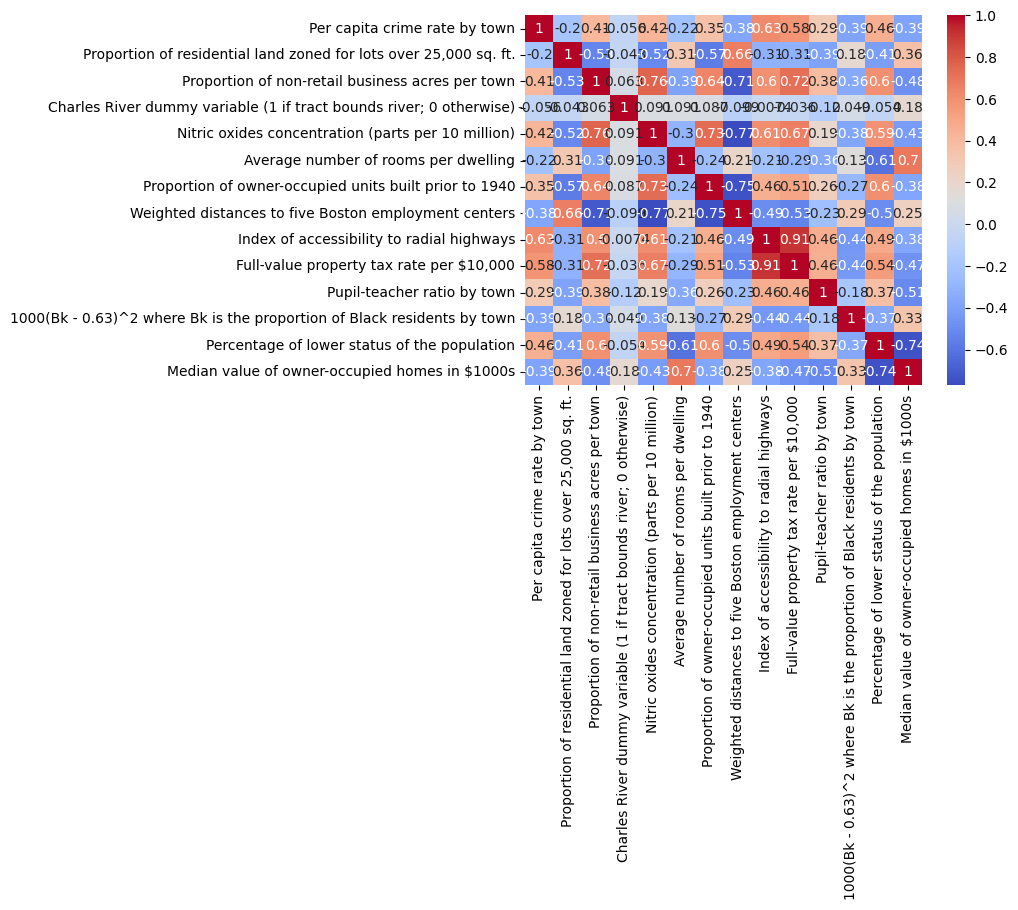

"\nInterpretation of the Heatmap\nWhen you run this code, you will see a heatmap that represents the correlation matrix. Here’s how to interpret it:\n\nDiagonal Elements: The diagonal elements (from top left to bottom right) will always be 1 because each feature is perfectly correlated with itself.\nPositive Correlations: Positive values (closer to 1) indicate that as one feature increases, the other feature tends to also increase. These will appear in warm colors (reds/oranges).\nNegative Correlations: Negative values (closer to -1) indicate that as one feature increases, the other feature tends to decrease. These will appear in cool colors (blues).\nNo Correlation: Values around 0 indicate little to no linear relationship between the features. These will be in neutral colors (white or very light shades).\n\nExample Interpretation\nLet's interpret a few example correlations that might appear in the heatmap:\n\nAverage number of rooms per dwelling (RM) vs. Median value of owner-occupie

In [24]:
"""
Calculate the Correlation Matrix:

data.corr() calculates the Pearson correlation coefficients between the features. The result is a correlation matrix that shows how strongly pairs of features are linearly related. The correlation coefficient ranges from -1 to 1, where:
1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.
Create a Heatmap:

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') creates a heatmap to visualize the correlation matrix.
corr_matrix is the data being visualized.
annot=True means that the correlation coefficient values will be annotated (displayed) on the heatmap.
cmap='coolwarm' specifies the color map. Here, 'coolwarm' is used, which displays positive correlations in warm colors (reds) and negative correlations in cool colors (blues).
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
"""
Interpretation of the Heatmap
When you run this code, you will see a heatmap that represents the correlation matrix. Here’s how to interpret it:

Diagonal Elements: The diagonal elements (from top left to bottom right) will always be 1 because each feature is perfectly correlated with itself.
Positive Correlations: Positive values (closer to 1) indicate that as one feature increases, the other feature tends to also increase. These will appear in warm colors (reds/oranges).
Negative Correlations: Negative values (closer to -1) indicate that as one feature increases, the other feature tends to decrease. These will appear in cool colors (blues).
No Correlation: Values around 0 indicate little to no linear relationship between the features. These will be in neutral colors (white or very light shades).

Example Interpretation
Let's interpret a few example correlations that might appear in the heatmap:

Average number of rooms per dwelling (RM) vs. Median value of owner-occupied homes in $1000s (MEDV):

A high positive correlation (e.g., 0.7) would suggest that homes with more rooms tend to have higher median values.
"""


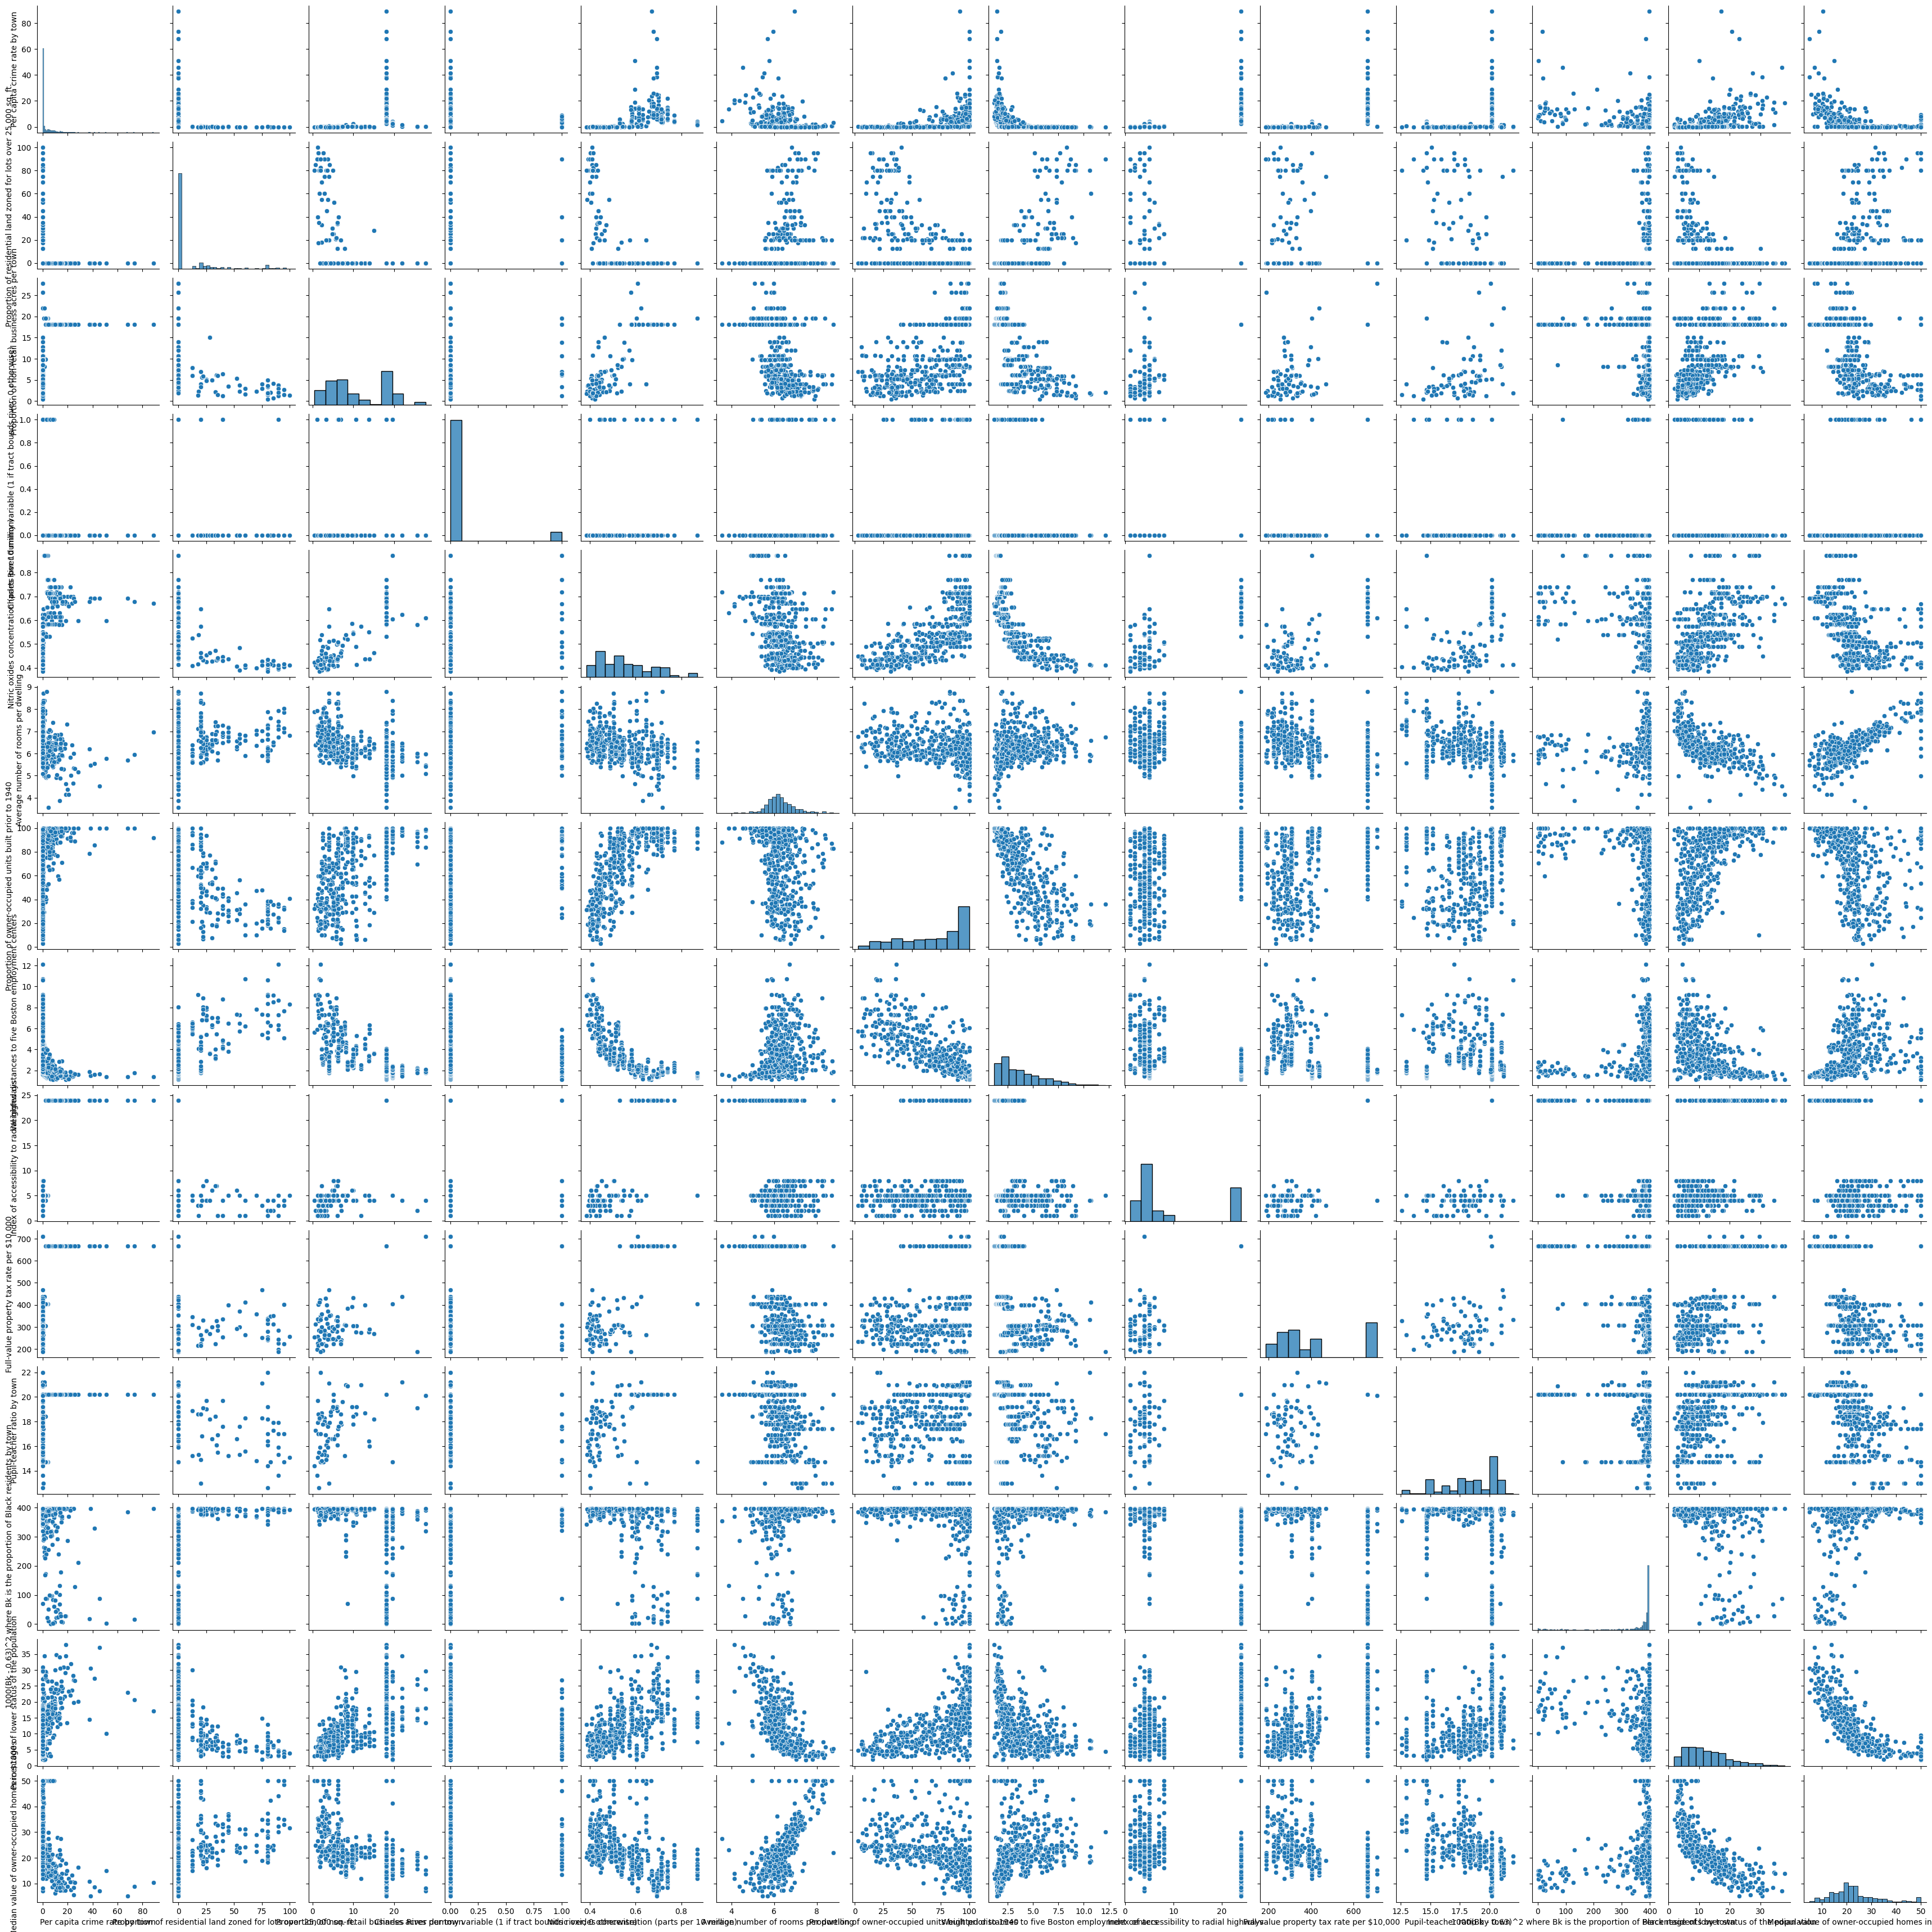

"\n\n\nExample Insights from Pairplot\nLet's look at some hypothetical insights you might gain from the pairplot:\n\nAverage number of rooms per dwelling (RM) vs. Median value of owner-occupied homes in $1000s (MEDV):\n\nIf you observe an upward trend, it suggests that homes with more rooms tend to have higher median values.\nPercentage of lower status of the population (LSTAT) vs. Median value of owner-occupied homes in $1000s (MEDV):\n\nIf you see a downward trend, it suggests that as the percentage of lower status population increases, the median value of homes tends to decrease.\nNitric oxides concentration (NOX) vs. Weighted distances to five Boston employment centers (DIS):\n\nIf you see a downward trend, it suggests that areas closer to employment centers tend to have lower NOX concentrations.\n\n\nImportance of Pairplot in EDA\nA pairplot is extremely useful in EDA for several reasons:\n\nVisualizing Relationships: It provides a comprehensive visual summary of the relationships

In [25]:
sns.pairplot(data)
plt.show()

"""


Example Insights from Pairplot
Let's look at some hypothetical insights you might gain from the pairplot:

Average number of rooms per dwelling (RM) vs. Median value of owner-occupied homes in $1000s (MEDV):

If you observe an upward trend, it suggests that homes with more rooms tend to have higher median values.
Percentage of lower status of the population (LSTAT) vs. Median value of owner-occupied homes in $1000s (MEDV):

If you see a downward trend, it suggests that as the percentage of lower status population increases, the median value of homes tends to decrease.
Nitric oxides concentration (NOX) vs. Weighted distances to five Boston employment centers (DIS):

If you see a downward trend, it suggests that areas closer to employment centers tend to have lower NOX concentrations.


Importance of Pairplot in EDA
A pairplot is extremely useful in EDA for several reasons:

Visualizing Relationships: It provides a comprehensive visual summary of the relationships between all pairs of variables.
Identifying Trends: It helps identify linear or non-linear trends between variables.
Detecting Outliers: Outliers can be easily spotted in scatterplots as points that deviate significantly from the trend.
Checking Data Distribution: The histograms on the diagonal help understand the distribution of individual variables, which is crucial for identifying skewness, kurtosis, and other distribution characteristics
"""

# Data Preprocessing:

In [26]:
# Checking for missing values
data.isnull().sum()

# Separate features (X) and target variable (y)
X = data.drop('Median value of owner-occupied homes in $1000s', axis=1)
y = data['Median value of owner-occupied homes in $1000s']


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
X: The features.
y: The target variable.
test_size=0.2: Specifies that 20% of the data should be used for testing, and the remaining 80% for training.
random_state=42: Ensures reproducibility of the split. By setting a random state, you get the same split each time you run the code.
"""


'\nX: The features.\ny: The target variable.\ntest_size=0.2: Specifies that 20% of the data should be used for testing, and the remaining 80% for training.\nrandom_state=42: Ensures reproducibility of the split. By setting a random state, you get the same split each time you run the code.\n'

In [27]:
X

,Per capita crime rate by town,"Proportion of residential land zoned for lots over 25,000 sq. ft.",Proportion of non-retail business acres per town,Charles River dummy variable (1 if tract bounds river; 0 otherwise),Nitric oxides concentration (parts per 10 million),Average number of rooms per dwelling,Proportion of owner-occupied units built prior to 1940,Weighted distances to five Boston employment centers,Index of accessibility to radial highways,"Full-value property tax rate per $10,000",Pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town,Percentage of lower status of the population
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Median value of owner-occupied homes in $1000s, Length: 506, dtype: float64

# Training the Model:

In [29]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluating the Model:



### Example Scenario

Suppose we have a small dataset of actual house prices and predicted house prices:

- **Actual Prices (in $1000s)**: [200, 210, 190, 220, 230]
- **Predicted Prices (in $1000s)**: [195, 215, 180, 225, 235]

### Step-by-Step Calculation

#### 1. Mean Absolute Error (MAE)

First, we calculate the absolute errors and then the mean of those errors:

\[
\begin{align*}
\text{Absolute Errors} & : |200 - 195|, |210 - 215|, |190 - 180|, |220 - 225|, |230 - 235| \\
& : 5, 5, 10, 5, 5 \\
\text{MAE} & = \frac{5 + 5 + 10 + 5 + 5}{5} = \frac{30}{5} = 6
\end{align*}
\]

**Pros**: Simple to understand and interpret.
**Cons**: Does not penalize large errors as much as MSE and RMSE.

#### 2. Mean Squared Error (MSE)

Next, we calculate the squared errors and then the mean of those squared errors:

\[
\begin{align*}
\text{Squared Errors} & : (200 - 195)^2, (210 - 215)^2, (190 - 180)^2, (220 - 225)^2, (230 - 235)^2 \\
& : 25, 25, 100, 25, 25 \\
\text{MSE} & = \frac{25 + 25 + 100 + 25 + 25}{5} = \frac{200}{5} = 40
\end{align*}
\]

**Pros**: Penalizes larger errors more than MAE.
**Cons**: Units are squared, making interpretation less intuitive.

#### 3. Root Mean Squared Error (RMSE)

Finally, we take the square root of the MSE:

\[
\text{RMSE} = \sqrt{40} \approx 6.32
\]

**Pros**: Maintains the original units of the target variable.
**Cons**: More sensitive to large errors compared to MAE.

### Interpretation

- **MAE (Mean Absolute Error)**:
  - **Pros**: In our example, MAE is 6. This means that, on average, the model's predictions are off by $6000. It's straightforward to interpret.
  
  - **Cons**: MAE does not distinguish between small and large errors. For instance, whether the error is $5000 or $10,000, it only takes the absolute value without penalizing larger errors more heavily.

- **MSE (Mean Squared Error)**:
  - **Pros**: MSE is 40, which penalizes larger errors more. This is useful if you want to highlight significant deviations more prominently.
  - **Cons**: The units are squared ($1000^2), making it less intuitive to interpret directly in terms of dollars.

- **RMSE (Root Mean Squared Error)**:
  - **Pros**: RMSE is approximately 6.32, close to MAE but with a slight emphasis on larger errors. It is in the same units as the target variable, making it more interpretable.
  - **Cons**: Similar to MSE, it is sensitive to larger errors but provides a balance since it returns to the original units.

### Summary

- **MAE**: Best for simple interpretation and when you want an overall average error without penalizing large errors disproportionately.
- **MSE**: Best for scenarios where large errors are particularly undesirable, and you want to penalize them more heavily.
- **RMSE**: Combines the interpretability of MAE with the sensitivity to large errors of MSE, making it a balanced measure for average error magnitude.



In [30]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")#Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values.
print(f"Mean Squared Error: {mse}")#Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values.
print(f"Root Mean Squared Error: {rmse}")#Root Mean Squared Error (RMSE) is the square root of MSE, which brings the units back to the original scale of the target variable


Mean Absolute Error: 3.189091965887837
Mean Squared Error: 24.291119474973478
Root Mean Squared Error: 4.928602182665332


# Interpreting the Coefficients:

In [31]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



"""
based on the coefficient values:

- Features with higher absolute coefficient values have a stronger influence on the predictions.
- A positive coefficient indicates that an increase in the feature value leads to an increase in the target variable (MEDV), while a negative coefficient indicates the opposite.
"""



                                                    Coefficient
Per capita crime rate by town                         -0.113056
Proportion of residential land zoned for lots o...     0.030110
Proportion of non-retail business acres per town       0.040381
Charles River dummy variable (1 if tract bounds...     2.784438
Nitric oxides concentration (parts per 10 million)   -17.202633
Average number of rooms per dwelling                   4.438835
Proportion of owner-occupied units built prior ...    -0.006296
Weighted distances to five Boston employment ce...    -1.447865
Index of accessibility to radial highways              0.262430
Full-value property tax rate per $10,000              -0.010647
Pupil-teacher ratio by town                           -0.915456
1000(Bk - 0.63)^2 where Bk is the proportion of...     0.012351
Percentage of lower status of the population          -0.508571


'\nbased on the coefficient values:\n\n- Features with higher absolute coefficient values have a stronger influence on the predictions.\n- A positive coefficient indicates that an increase in the feature value leads to an increase in the target variable (MEDV), while a negative coefficient indicates the opposite.\n'

In [32]:
r_squared = model.score(X_test,y_test)


In [34]:
r_squared

0.6687594935356326

In [33]:
# Prepare input data
single_value = [[0.1, 25, 5, 1, 0.5, 6, 50, 5, 4, 300, 15, 400, 10]]

# Make prediction
prediction = model.predict(single_value)
print("Predicted Median House Value:", prediction)


Predicted Median House Value: [28.43075746]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
